<a href="https://colab.research.google.com/github/lokeshreddyayyaswamy/Agri_Horticulture_Crop_Price_Prediction/blob/main/Crop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/SIH-Final-Dataset-1647.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Centre_Name,Commodity_Name,Season,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,AGARTALA,ATTA,Kharif,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,...,13.023810,15.772727,16.068182,16.090909,19.521739,19.300000,21.000000,19.406213,21.350715,22.774808
1,AGARTALA,ATTA,Rabi,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,...,13.250000,15.428571,16.681818,16.857143,19.350000,19.444444,18.428571,19.406213,21.350715,22.774808
2,AGARTALA,ATTA,Zaid,6.292407,7.011038,7.083431,7.782280,8.382464,8.494851,8.910994,...,11.277778,15.700000,16.666667,16.000000,18.750000,20.000000,21.000000,19.406213,21.350715,22.774808
3,AGARTALA,Brinjal,Kharif,6.682930,7.446162,8.293787,9.112049,9.814788,11.311268,13.035921,...,17.664784,18.866586,20.150150,19.716981,16.868241,16.674924,17.983714,22.868878,19.182390,20.461855
4,AGARTALA,Brinjal,Rabi,6.682930,7.446162,8.293787,9.112049,9.814788,11.311268,13.035921,...,17.664784,18.866586,18.000000,18.811881,20.000000,16.674924,17.983714,22.868878,19.182390,20.461855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,WAYANAD,Sunflower Oil (Packed),Zaid,25.845432,28.797139,32.075227,35.239758,37.957516,43.744976,45.887943,...,62.182075,66.412555,72.463235,66.973877,67.041623,84.212520,92.117655,97.622782,94.786625,90.000000
3318,WAYANAD,Tomato,Rabi,3.737263,4.164082,4.638095,5.095688,5.488677,6.325547,6.635421,...,9.000000,9.125000,27.430723,17.780379,20.187050,18.139296,20.084685,27.504689,25.750572,27.021739
3319,WAYANAD,Tomato,Zaid,3.737263,4.164082,4.638095,5.095688,5.488677,6.325547,6.635421,...,9.000000,9.125000,27.430723,17.780379,20.187050,18.139296,20.084685,27.504689,25.750572,15.352941
3320,WAYANAD,Urad Dal,Rabi,24.675238,27.176105,27.176105,29.857290,32.159942,37.063434,38.879087,...,52.684478,44.966414,42.016347,51.040970,66.687571,63.417107,60.248889,59.659666,71.860331,80.000000


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
# Filter only "AGARTALA" and "ATTA"
df_filtered = df[(df["Centre_Name"] == "VIJAYWADA") & (df["Commodity_Name"] == "Masoor Dal")]

In [ ]:
df_filtered

,Centre_Name,Commodity_Name,Season,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
3259,VIJAYWADA,Masoor Dal,Kharif,13.218499,14.728132,16.404692,18.023172,19.413154,22.373118,23.469126,...,31.802667,34.189143,48.418933,57.619614,46.35514,45.759615,52.372549,61.135593,69.000000,73.952864
3260,VIJAYWADA,Masoor Dal,Rabi,13.218499,14.728132,16.404692,18.023172,19.413154,22.373118,23.469126,...,31.802667,34.189143,48.418933,57.619614,43.00000,47.148515,52.019802,58.171717,64.683673,70.192982
3261,VIJAYWADA,Masoor Dal,Zaid,13.218499,14.728132,16.404692,18.023172,19.413154,22.373118,23.469126,...,31.802667,34.189143,48.418933,57.619614,48.18750,46.000000,49.000000,57.073171,65.918919,71.000000


<Figure size 800x500 with 0 Axes>

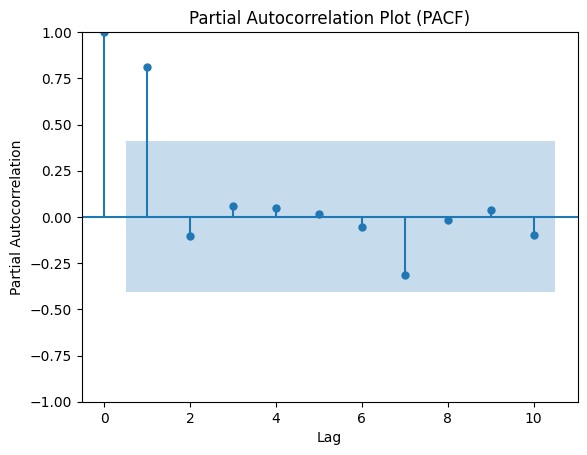

In [ ]:
# Select relevant columns: 2013, 2014 for training
years = [col for col in df_filtered.columns[2:] if col.isdigit()]
price_data = df_filtered[years].mean()  # Averaging across seasons

# Convert to DataFrame with years as index
price_series = pd.DataFrame({"Year": price_data.index.astype(int), "Price": price_data.values})

# Plot PACF to find the best lag (p)
plt.figure(figsize=(8, 5))
plot_pacf(price_series["Price"], lags=10, method='ywm')
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Plot (PACF)")
plt.show()

In [ ]:
# Train AR model with lag=2 (previous years)
model = AutoReg(price_series["Price"], lags=1)
model_fit = model.fit()

In [ ]:
# Print model coefficients
print("\nAutoRegressive Model Coefficients:")
print(model_fit.params)


AutoRegressive Model Coefficients:
const       1.204281
Price.L1    1.043784
dtype: float64


In [ ]:
print(price_series)

    Year      Price
0   1993  13.218499
1   1994  14.728132
2   1995  16.404692
3   1996  18.023172
4   1997  19.413154
5   1998  22.373118
6   1999  23.469126
7   2000  24.449553
8   2001  25.410053
9   2002  26.551780
10  2003  27.603472
11  2004  28.684892
12  2005  29.958112
13  2006  31.802667
14  2007  34.189143
15  2008  48.418933
16  2009  57.619614
17  2010  45.847547
18  2011  46.302710
19  2012  51.130784
20  2013  58.793494
21  2014  66.534197
22  2015  71.715282


In [ ]:
# Predict prices from 2016 to 2025
start_year = 2016
end_year = 2025
future_years = list(range(start_year, end_year + 1))

predicted_prices = model_fit.predict(start=len(price_series), end=len(price_series) + (end_year - start_year))

In [ ]:
# Convert predictions to a pandas series for better visualization
predicted_series = pd.Series(predicted_prices.values, index=future_years)

# Print predicted prices
print("\nPredicted Masoor Dal Prices for Vijayawada (2016 - 2025):")
print(predicted_series)


Predicted Masoor Dal Prices for Vijayawada (2016 - 2025):
2016     76.059516
2017     80.593957
2018     85.326931
2019     90.267132
2020     95.423633
2021    100.805905
2022    106.423831
2023    112.287730
2024    118.408373
2025    124.796999
dtype: float64


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#  Step 1: Check Stationarity & Find `d`
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Test Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("✅ The series is stationary (No differencing needed)")
        return 0
    else:
        print("❌ The series is NOT stationary (Differencing needed)")
        return 1

d = check_stationarity(price_series.diff().dropna()["Price"])  # First difference

ADF Test Statistic: -4.317901696272507
p-value: 0.0004135508073127713
✅ The series is stationary (No differencing needed)


<Figure size 800x500 with 0 Axes>

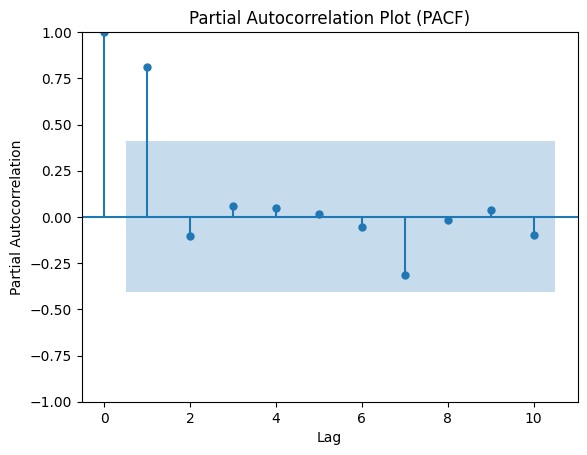

In [ ]:
plt.figure(figsize=(8, 5))
plot_pacf(price_series["Price"], lags=10, method='ywm')
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("Partial Autocorrelation Plot (PACF)")
plt.show()

<Figure size 800x500 with 0 Axes>

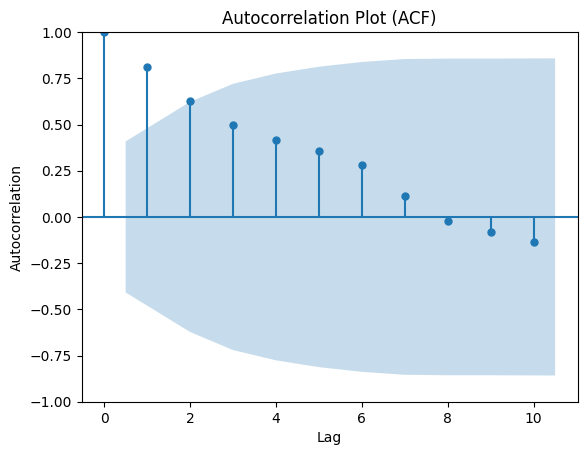

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(8, 5))
plot_acf(price_series["Price"], lags=10)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Plot (ACF)")
plt.show()

In [ ]:
model = ARIMA(price_series["Price"], order=(1, 2, 3))
# Provide starting values for all model parameters including variance
model_fit = model.fit(start_params=[0.1, 0.1, 0.1, 0.1,0.1])  # starting values for AR, MA and variance

In [ ]:
print(model_fit.params)

ar.L1      0.113195
ma.L1     -0.888763
ma.L2     -0.883330
ma.L3      0.995774
sigma2    13.270697
dtype: float64


In [ ]:
predicted_prices = model_fit.predict(start=len(price_series), end=len(price_series) + (end_year - start_year))

# Convert predictions to a pandas series
predicted_series = pd.Series(predicted_prices.values, index=future_years)

# Print predicted prices
print("\nPredicted Masoor Dal Prices for Vijayawada (2016 - 2025) using ARIMA Model:")
print(predicted_series)


Predicted Masoor Dal Prices for Vijayawada (2016 - 2025) using ARIMA Model:
2016     77.700784
2017     79.146149
2018     84.387367
2019     90.058255
2020     95.777780
2021    101.502810
2022    107.228463
2023    112.954187
2024    118.679919
2025    124.405651
dtype: float64


In [ ]:
# Predictions for in-sample data (fitted values)
fitted_values = model_fit.fittedvalues
fitted_values

,0
0,0.000000
1,19.827825
2,16.237838
3,18.041894
4,19.561513
5,20.925592
6,24.603989
7,24.243620
8,26.820339
9,26.637731


In [ ]:
# Evaluate model
mse = mean_squared_error(price_series["Price"][1:], fitted_values[1:]) # Select only 'Price' column from price_series
rmse = np.sqrt(mse)
mae = mean_absolute_error(price_series["Price"][1:], fitted_values[1:]) # Select only 'Price' column from price_series
mape = np.mean(np.abs((price_series["Price"][1:] - fitted_values[1:]) / price_series["Price"][1:])) * 100 # Select only 'Price' column from price_series

print("\n🔍 Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


🔍 Model Evaluation Metrics:
Mean Squared Error (MSE): 16.21
Root Mean Squared Error (RMSE): 4.03
Mean Absolute Error (MAE): 2.51
Mean Absolute Percentage Error (MAPE): 6.65%


In [ ]:
from prophet import Prophet

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [ ]:
# Load data
years = price_series["Year"].values.reshape(-1, 1)  # Independent variable
prices = price_series["Price"].values.reshape(-1, 1)  # Target variable

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Create sequences (lags=1)
def create_sequences(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)

lag = 2  # Using AR(1) as per your model
X, y = create_sequences(prices_scaled, lag)

# Reshape for LSTM (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train/test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
X_train

array([[[0.        ],
        [0.02580712]],

       [[0.02580712],
        [0.05446783]],

       [[0.05446783],
        [0.08213569]],

       [[0.08213569],
        [0.10589737]],

       [[0.10589737],
        [0.15649782]],

       [[0.15649782],
        [0.17523403]],

       [[0.17523403],
        [0.19199439]],

       [[0.19199439],
        [0.2084141 ]],

       [[0.2084141 ],
        [0.22793186]],

       [[0.22793186],
        [0.2459105 ]],

       [[0.2459105 ],
        [0.26439733]],

       [[0.26439733],
        [0.28616297]],

       [[0.28616297],
        [0.31769555]],

       [[0.31769555],
        [0.35849227]],

       [[0.35849227],
        [0.60174991]],

       [[0.60174991],
        [0.75903515]]])

In [ ]:
# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(lag, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=4, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1470
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1024
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1160
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0765
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0869 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1131
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0760 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0493 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0471 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0327
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0430
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0625
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0383
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0354 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0313
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)  # Convert back to original scale
y_test_inv = scaler.inverse_transform(y_test)  # Convert back to original scale

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [ ]:
y_test_inv

array([[46.30271008],
       [51.13078367],
       [58.79349371],
       [66.53419746],
       [71.71528228]])

In [ ]:
y_pred_inv

array([[50.912003],
       [46.39717 ],
       [48.359158],
       [52.86623 ],
       [58.91327 ]], dtype=float32)

In [ ]:
# Evaluate model
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"MAE: {mae:.2f}")

MAE: 9.25


In [ ]:
# Define the number of years to predict
future_years = np.arange(2016, 2026)  # Predict from 2016 to 2025

# Start with the last known data point (2015)
last_known = X_test[-1]  # Last sequence from test data
future_predictions = []

for _ in range(len(future_years)):
    next_pred = model.predict(last_known.reshape(1, lag, 1))  # Predict next step
    future_predictions.append(next_pred[0, 0])  # Store prediction
    last_known = np.roll(last_known, -1)  # Shift window
    last_known[-1] = next_pred  # Insert new predicted value

# Convert to Pandas Series for easy visualization
predicted_series = pd.Series(future_predictions, index=future_years)

# Print results
print("\nPredicted Prices for 2016 - 2025 using LSTM:")
print(scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Predicted Prices for 2016 - 2025 using LSTM:
[[58.91327 ]
 [59.958588]
 [56.73416 ]
 [56.123943]
 [54.458893]
 [53.635635]
 [52.631313]
 [51.945145]
 [51.28413 ]
 [50.75852 ]]
